In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Загрузка объениненного датасета без выбросов
df = pd.read_excel(r"/content/Unitednew.xlsx")
df.shape

(923, 15)

#Прогноз  модуля упругости при растяжении, ГПа

In [ ]:
#Разделение на тестовую, тренировочную выборки, выделение предикторов и целевых переменных
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
    df[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

In [ ]:
# Проверка правильности разбивки
df_norm_n.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [ ]:
x_train_2.head()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
855,0.272112,0.272112,0.000715,0.558949,0.153950,0.028360,0.005709,0.080934,0.011046,0.708980,0.070166,0.000286,0.001500,0.016789
559,0.213954,0.213954,0.000618,0.649152,0.128215,0.034986,0.006084,0.086963,0.012719,0.676613,0.052711,0.000338,0.001441,0.017312
368,0.119021,0.119021,0.000807,0.571792,0.254280,0.044231,0.006982,0.087852,0.163552,0.733640,0.066271,0.000000,0.001051,0.023408
487,0.150114,0.150114,0.000665,0.574640,0.058623,0.027510,0.007100,0.071571,0.183489,0.760945,0.045106,0.000269,0.002310,0.014813
651,0.215475,0.215475,0.000410,0.587940,0.221451,0.025956,0.006996,0.071984,0.077478,0.704786,0.054136,0.000293,0.001286,0.017439


In [ ]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
855,71.367577
559,80.419862
368,71.927507
487,73.241464
651,80.691499
...,...
106,74.519119
270,70.325533
860,74.588556
435,70.199234


In [ ]:
y_train_2.shape

(646, 1)

In [ ]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [ ]:
#Проверка различных моделей при стандартных параметрах
# Метод опорных векторов - 1

svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(x_train_2, np.ravel(y_train_2))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
mse_svr_elast2 = mean_squared_error(y_test_2,y_pred_svr2)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки


Support Vector Regression Results Train:
Test score: 0.90
Support Vector Regression Results:
SVR_MAE: 3
SVR_MAPE: 0.04
SVR_MSE: 17.68
SVR_RMSE: 4.20
Test score: -0.93


In [ ]:
#Результаты модели, выдающей среднее значение
mse_lin_elast2_mean = mean_squared_error(y_test_2, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_elast2_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast2_mean))

MAE for mean target:  2.488669047601133
MSE for mean target:  9.156644337435315
RMSE for mean target:  3.025994768243216


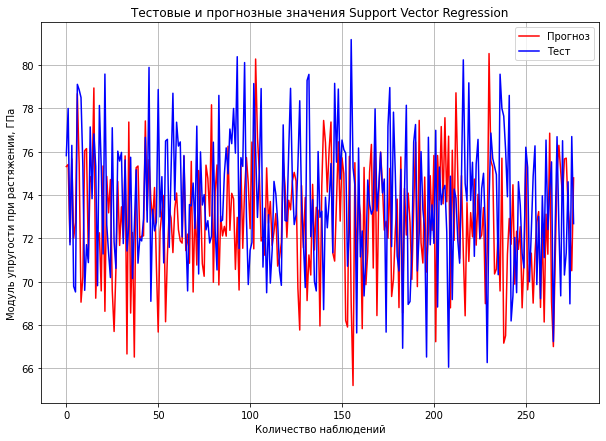

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз", color = "red")
plt.plot(y_test_2.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
# Метод случайного леса - Random Forest Regressor - 2

#построение модели и вузуализация метода случайный лес
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Test score: 0.38
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.04
RF_MSE: 10.42
RF_RMSE: 3.23
Test score: -0.14


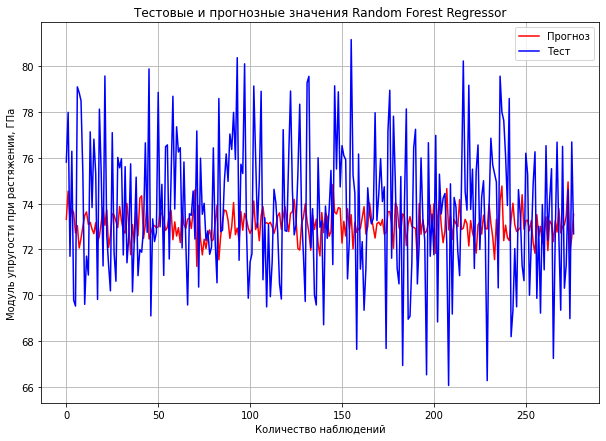

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = "red")
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
#Метод линейной регрессии - Linear Regression - 3

#построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.01
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.03
lr_MSE: 9.69
lr_RMSE: 3.11
Test score: -0.06


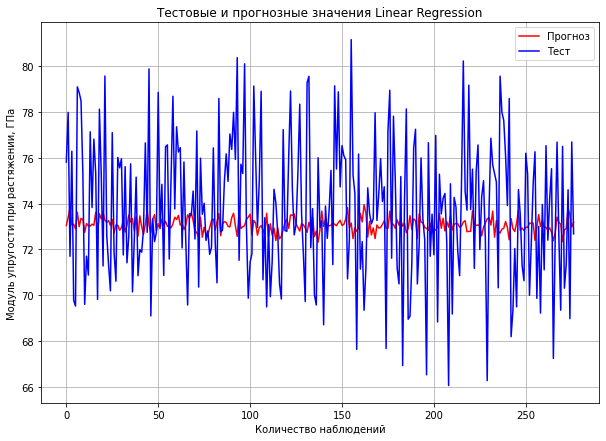

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

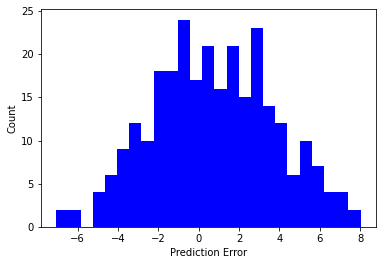

In [ ]:
error = y_test_2 - y_pred_lr2
plt.hist(error, bins = 25, color = "b")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
mse_gbr_elast2 = mean_squared_error(y_test_2,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Gradient Boosting Regressor Results Train:
Test score: 0.51
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 10.66
GBR_RMSE: 3.27
Test score: -0.16


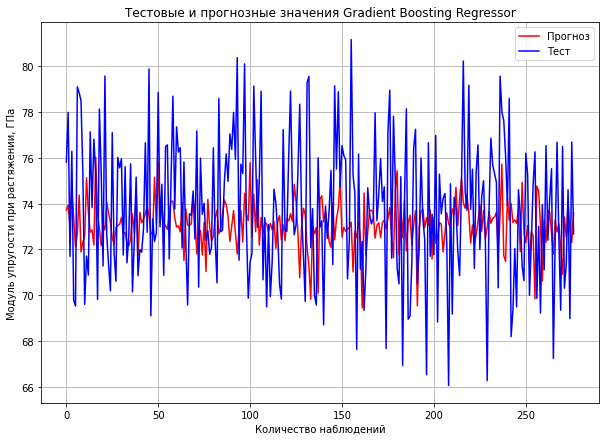

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз", color = "red")
plt.plot(y_test_2.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_knn2 = knn2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
mse_knn_elast2 = mean_squared_error(y_test_2,y_pred_knn2)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

K Neighbors Regressor  Results Train:
Test score: 0.21
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 11.33
KNN_RMSE: 3.37
Test score: -0.24


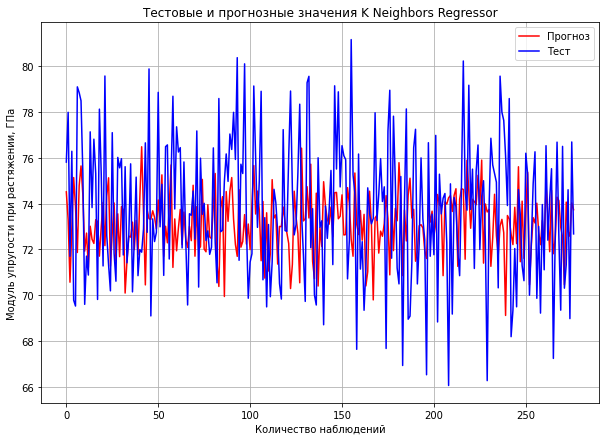

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

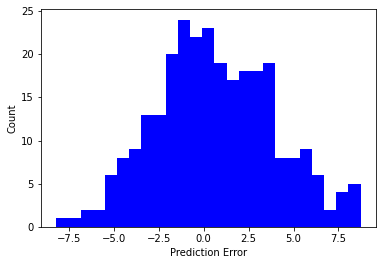

In [ ]:
#Визуализация гистограммы распределения ошибки
error = y_test_2 - y_pred_knn2
plt.hist(error, bins = 25, color = "b")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
#Деревья решений - Decision Tree Regressor - 6

dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
mse_dtr_elast2 = mean_squared_error(y_test_2,y_pred_dtr2)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast2))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Decision Tree Regressor Results Train:
Test score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  3
DTR_MSE: 19.21
DTR_RMSE: 4.38
DTR_MAPE: 0.05
Test score: -1.10


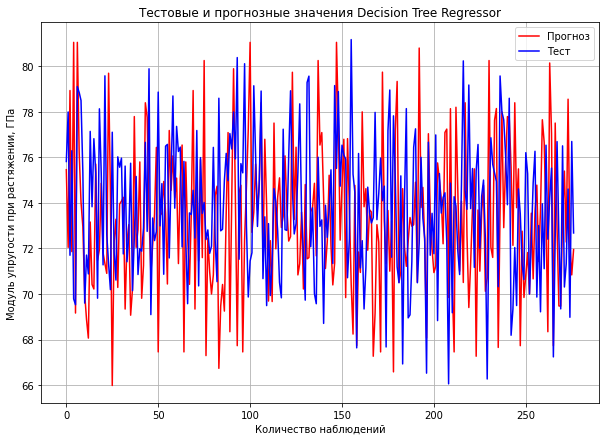

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
# Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor - 7 

sdg2 = SGDRegressor()
sdg2.fit(x_train_2, y_train_2)
y_pred_sdg2 = sdg2.predict(x_test_2)
mae_sdg2 = mean_absolute_error(y_pred_sdg2, y_test_2)
mse_sdg_elast2 = mean_squared_error(y_test_2,y_pred_sdg2)
print('Stochastic Gradient Descent Regressor Results Train:')
print("Test score: {:.2f}".format(sdg2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_sdg2)))
print('SGD_MSE: {:.2f}'.format(mse_sdg_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_sdg_elast2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_sdg2)))
print("Test score: {:.2f}".format(sdg2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Stochastic Gradient Descent Regressor Results Train:
Test score: -0.01
Stochastic Gradient Descent Regressor Results:
SGD_MAE:  3
SGD_MSE: 10.12
SGD_RMSE: 3.18
SGD_MAPE: 0.03
Test score: -0.11


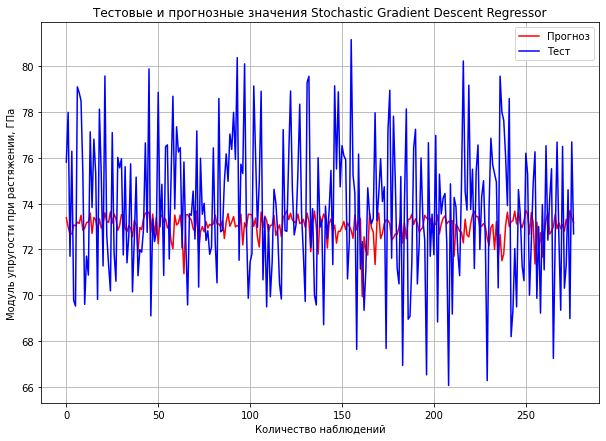

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Stochastic Gradient Descent Regressor")
plt.plot(y_pred_sdg2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
# Многослойный перцептрон - Multi-layer Perceptron regressor - 8

mlp2 = MLPRegressor(random_state = 1, max_iter = 500)
mlp2.fit(x_train_2, y_train_2)
y_pred_mlp2 = mlp2.predict(x_test_2)
mae_mlp2 = mean_absolute_error(y_pred_mlp2, y_test_2)
mse_mlp_elast2 = mean_squared_error(y_test_2,y_pred_mlp2)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_mlp2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_mlp2)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast2)))
print("Test score: {:.2f}".format(mlp2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Multi-layer Perceptron regressor Results Train:
Test score: -0.84
Multi-layer Perceptron regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.04
SGD_MSE: 14.69
SGD_RMSE: 3.83
Test score: -0.60


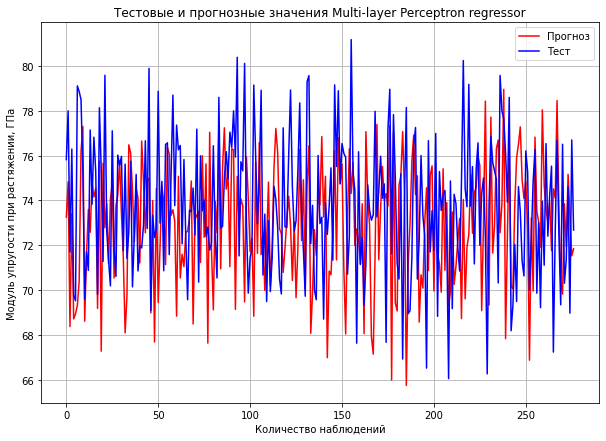

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
# Лассо регрессия - the Lasso - 9

clf2 = linear_model.Lasso(alpha = 0.1)
clf2.fit(x_train_2, y_train_2)
y_pred_clf2 = clf2.predict(x_test_2)
mae_clf2 = mean_absolute_error(y_pred_clf2, y_test_2)
mse_clf_elast2 = mean_squared_error(y_test_2,y_pred_clf2)
print('Lasso regressor Results Train:')
print("Test score: {:.2f}".format(clf2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Lasso regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_clf2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_clf2)))
print('SGD_MSE: {:.2f}'.format(mse_clf_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_clf_elast2)))
print("Test score: {:.2f}".format(clf2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Lasso regressor Results Train:
Test score: 0.00
Lasso regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.03
SGD_MSE: 9.65
SGD_RMSE: 3.11
Test score: -0.05


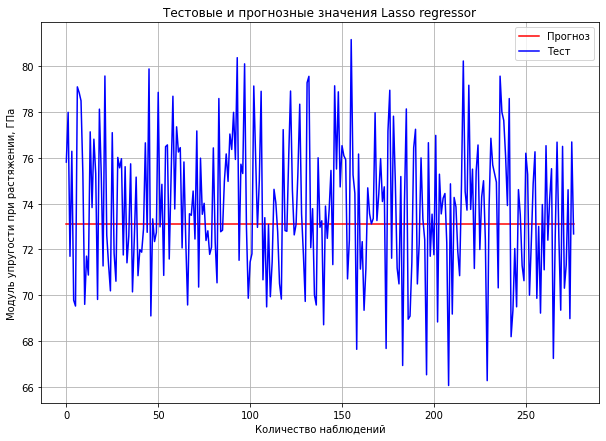

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf2, label = "Прогноз", color = 'red')
plt.plot(y_test_2.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
#сравнение моделей по метрике МАЕ
mae_df2 = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', 'Lasso'], 'MAE': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2, mae_dtr2, mae_sdg2, mae_mlp2, mae_clf2]} 
mae_df2 = pd.DataFrame(mae_df2)

In [ ]:
mae_df2

,Регрессор,MAE
0,Support Vector,3.295316
1,RandomForest,2.648371
2,Linear Regression,2.535163
3,GradientBoosting,2.660585
4,KNeighbors,2.673409
5,DecisionTree,3.460973
6,SGD,2.591770
7,MLP,3.052449
8,Lasso,2.530635


In [ ]:
# Проведение поиска  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запуск обучения модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 169, 'weights': 'uniform'}

In [ ]:
#Выведение гиперпараметров для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(x_test_2, y_test_2).round(3)}')

KNeighborsRegressor(n_neighbors=169)
R2-score KNR для модуля упругости при растяжении: -0.069


In [ ]:
#Подстановка оптимальных гиперпараметров в модель метода к ближайших соседей
knn21_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')
#Обучение модели
knn21_grid.fit(x_train_2, y_train_2)

predictions_knn21_grid = knn21_grid.predict(x_test_2)
#Оценка точности на тестовом наборе
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y_test_2)
mae_knn21_grid

2.627783639048058

In [ ]:
new_row_in_mae_df = {'Регрессор': 'KNeighbors1_GridSearchCV', 'MAE': mae_knn21_grid} 

mae_df2 = mae_df2.append(new_row_in_mae_df, ignore_index=True)
mae_df2

,Регрессор,MAE
0,Support Vector,3.295316
1,RandomForest,2.648371
2,Linear Regression,2.535163
3,GradientBoosting,2.660585
4,KNeighbors,2.673409
5,DecisionTree,3.460973
6,SGD,2.591770
7,MLP,3.052449
8,Lasso,2.530635
9,KNeighbors1_GridSearchCV,2.627784


In [ ]:
# Проведение поиска  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid21 = {'criterion': criterion21,
               'splitter': splitter21,
               'max_depth': max_depth21,
               'min_samples_split': min_samples_split21,
               'min_samples_leaf': min_samples_leaf21,
               'max_features': max_features21}
#Запуск обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(dtr2, param_grid21, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'friedman_mse',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 100,
 'min_samples_split': 250,
 'splitter': 'random'}

In [ ]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs21 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {gs21.score(x_test_2, y_test_2).round(3)}')

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='log2', min_samples_leaf=100,
                      min_samples_split=250, splitter='random')
R2-score DTR для модуля упругости при растяжении: -0.068


In [ ]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      min_samples_leaf=100, min_samples_split=250)
#Обучаем модель
dtr21_grid.fit(x_train_2, y_train_2)

predictions_dtr21_grid = dtr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

2.58806618537722

In [ ]:
new_row_in_mae_df = {'Регрессор': 'DecisionTree1_GridSearchCV', 'MAE': mae_dtr21_grid} 

mae_df2 = mae_df2.append(new_row_in_mae_df, ignore_index=True)
mae_df2

,Регрессор,MAE
0,Support Vector,3.295316
1,RandomForest,2.648371
2,Linear Regression,2.535163
3,GradientBoosting,2.660585
4,KNeighbors,2.673409
5,DecisionTree,3.460973
6,SGD,2.591770
7,MLP,3.052449
8,Lasso,2.530635
9,KNeighbors1_GridSearchCV,2.627784


In [ ]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [SGDRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state=1, max_iter=500)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha=0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': SVR(C=10, gamma=100), 'regressor__C': 10, 'regressor__gamma': 100}

Наилучшее значение правильности перекрестной проверки: -0.01
Правильность на тестовом наборе: -0.05


In [ ]:
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', SVR(C=10, gamma=100))])


После обучения моделей была проведена оценка точности этих моделей на обучающей и тестовых выборках. В качестве параметра оценки модели использовалась средняя абсолютная ошибка (MAE). Обе модели даже на тренировочном датасете не смогли обучиться и приблизиться к исходным данным.

In [ ]:
#Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [ ]:
# Формирование входов и выходов для модели

tv = df['Соотношение матрица-наполнитель']
tr_v = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

In [ ]:
# Нормализация данных

x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [ ]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1):
    
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh'))  # выходной слой
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [ ]:
# Построение модели
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# Определение параметров
batch_size = [4, 10, 20, 50, 100]
epochs = [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [ ]:
# поиск оптимальных параметров
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=1, n_jobs=-1)


In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

optimizer = ['SGD', 'Adam']
param_grid = dict(opt=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END ............................................opt=SGD; total time=  21.7s
[CV] END ............................................opt=SGD; total time=  21.1s
[CV] END ............................................opt=SGD; total time=  41.8s
[CV] END ............................................opt=SGD; total time=  21.7s
[CV] END ............................................opt=SGD; total time=  21.4s
[CV] END ............................................opt=SGD; total time=  21.5s
[CV] END ............................................opt=SGD; total time=  21.8s
[CV] END ............................................opt=SGD; total time=  22.0s
[CV] END ............................................opt=SGD; total time=  21.8s
[CV] END ............................................opt=SGD; total time=  21.5s
[CV] END ...........................................opt=Adam; total time=  41.9s
[CV] END .......................................

In [ ]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001538 using {'opt': 'Adam'}
0.000000 (0.000000) with: {'opt': 'SGD'}
0.001538 (0.004615) with: {'opt': 'Adam'}


In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

layers = [[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ....................................lyrs=[12, 6, 3]; total time=  42.5s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  29.4s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  28.4s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  25.9s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  42.0s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  42.5s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  24.2s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  41.9s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  24.3s
[CV] END ....................................lyrs=[12, 6, 3]; total time=  24.0s
[CV] END ...................................lyrs=[64, 64, 3]; total time=  42.7s
[CV] END ...................................lyrs

In [ ]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001538 using {'lyrs': [12, 6, 3]}
0.001538 (0.004615) with: {'lyrs': [12, 6, 3]}
0.001538 (0.004615) with: {'lyrs': [64, 64, 3]}
0.001538 (0.004615) with: {'lyrs': [128, 64, 16, 3]}


In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

activation = ['softmax', 'relu', 'sigmoid', 'linear']
param_grid = dict(act=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(x_train, y_train)

In [ ]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001538 using {'act': 'softmax'}
0.001538 (0.004615) with: {'act': 'softmax'}
0.001538 (0.004615) with: {'act': 'relu'}
0.001538 (0.004615) with: {'act': 'sigmoid'}
0.001538 (0.004615) with: {'act': 'linear'}


In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

drops = [0.0, 0.05, 0.1, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END .............................................dr=0.0; total time=  21.4s
[CV] END .............................................dr=0.0; total time=  20.1s
[CV] END .............................................dr=0.0; total time=  42.7s
[CV] END .............................................dr=0.0; total time=  21.5s
[CV] END .............................................dr=0.0; total time=  21.4s
[CV] END .............................................dr=0.0; total time=  20.5s
[CV] END .............................................dr=0.0; total time=  21.6s
[CV] END .............................................dr=0.0; total time=  21.0s
[CV] END .............................................dr=0.0; total time=  21.4s
[CV] END .............................................dr=0.0; total time=  21.3s
[CV] END ............................................dr=0.05; total time=  20.7s
[CV] END .......................................

In [ ]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001538 using {'dr': 0.0}
0.001538 (0.004615) with: {'dr': 0.0}
0.001538 (0.004615) with: {'dr': 0.05}
0.001538 (0.004615) with: {'dr': 0.1}
0.001538 (0.004615) with: {'dr': 0.5}


In [ ]:
# построение окончательной модели (результаты равны между собой)
model = create_model(lyrs=[12, 6, 3], dr=0.05)

print(model.summary())

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_342 (Dense)           (None, 12)                180       
                                                                 
 dense_343 (Dense)           (None, 6)                 78        
                                                                 
 dense_344 (Dense)           (None, 3)                 21        
                                                                 
 dropout_135 (Dropout)       (None, 3)                 0         
                                                                 
 dense_345 (Dense)           (None, 3)                 12        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# обучение нейросети, 80/20 CV
model_hist = model.fit(x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 29.7469 - mae: 3.0450 - accuracy: 0.0000e+00 - val_loss: 28.6705 - val_mae: 2.7929 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 17.3066 - mae: 2.6965 - accuracy: 0.0000e+00 - val_loss: 12.0803 - val_mae: 2.4282 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 12.0635 - mae: 2.5504 - accuracy: 0.0000e+00 - val_loss: 11.0069 - val_mae: 2.3894 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 10.9654 - mae: 2.5232 - accuracy: 0.0000e+00 - val_loss: 9.9661 - val_mae: 2.3725 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 9.8368 - mae: 2.5116 - accuracy: 0.0000e+00 - val_loss: 8.9334 - val_mae: 2.3659 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 8.7948 - mae: 

In [ ]:
# Оценка модели
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 4ms/step - loss: -4.5188 - mae: 2.4751 - accuracy: 0.0000e+00

mae: 247.51%


In [ ]:
#Потери модели

model_hist.history

{'loss': [29.74688148498535,
  17.306591033935547,
  12.063478469848633,
  10.96538257598877,
  9.836787223815918,
  8.794800758361816,
  7.672361373901367,
  6.4651360511779785,
  5.448663234710693,
  4.1832475662231445,
  3.1698696613311768,
  1.9679189920425415,
  0.7113693356513977,
  -0.11828885227441788,
  -1.2845004796981812,
  -2.403280019760132,
  -3.292921304702759,
  -3.675483226776123,
  -4.205048561096191,
  -4.227399826049805,
  -4.286445140838623,
  -4.2249064445495605,
  -4.267198085784912,
  -4.393161773681641,
  -4.3347063064575195,
  -4.3248796463012695,
  -4.29444694519043,
  -4.32867956161499,
  -4.175279140472412,
  -4.185116291046143,
  -4.321426868438721,
  -4.2359747886657715,
  -4.097822189331055,
  -4.382653713226318,
  -4.189593315124512,
  -4.459948539733887,
  -4.244935512542725,
  -4.24812126159668,
  -4.296309471130371,
  -4.190910816192627,
  -4.373728275299072,
  -4.2669901847839355,
  -4.2695746421813965,
  -4.355574607849121,
  -4.126614570617676,
  

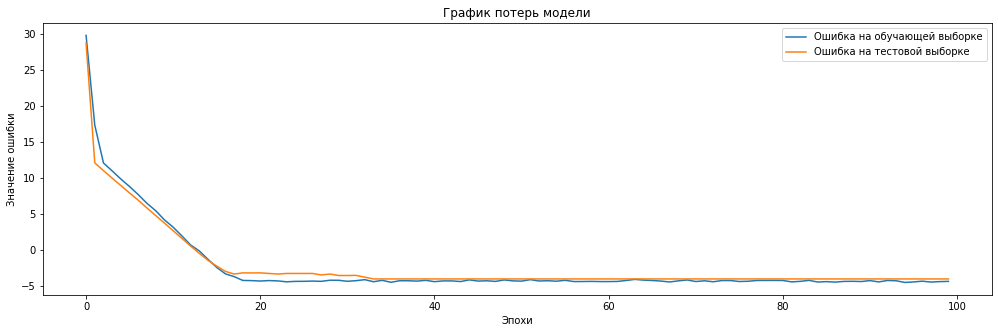

In [ ]:
# График потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist)

9/9 [==============================] - 0s 2ms/step


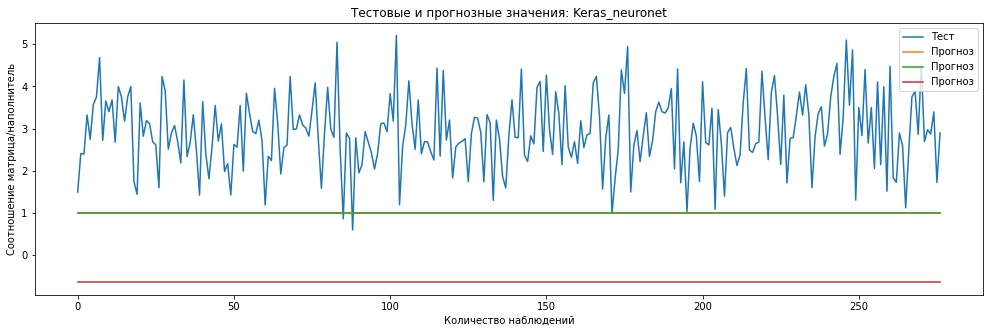

In [ ]:
# Функция для визуализации факт/прогноз для результатов моделей
# График результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [79]:
# Сконфигурируем другую модель, зададим слои
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Dense
model1 = tf.keras.Sequential([x_train_n, layers.Dense(128, activation='relu'), 
                                                 layers.Dense(128, activation='relu'), 
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(32, activation='relu'), 
                                                 layers.Dense(16, activation='relu'), 
                                                 layers.Dense(1)
                            ])

model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  
# Посмотрим на архитектуру модели

model1.summary()

Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 14)               29        
 n)                                                              
                                                                 
 dense_361 (Dense)           (None, 128)               1920      
                                                                 
 dense_362 (Dense)           (None, 128)               16512     
                                                                 
 dense_363 (Dense)           (None, 64)                8256      
                                                                 
 dense_364 (Dense)           (None, 32)                2080      
                                                                 
 dense_365 (Dense)           (None, 16)                528       
                                                    

In [80]:
# Обучение модели

model_hist1 = model1.fit(
    x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 3s 16ms/step - loss: 3.8666 - root_mean_squared_error: 1.9664 - val_loss: 2.5354 - val_root_mean_squared_error: 1.5923
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 1.3057 - root_mean_squared_error: 1.1427 - val_loss: 1.1748 - val_root_mean_squared_error: 1.0839
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 1.0302 - root_mean_squared_error: 1.0150 - val_loss: 1.1242 - val_root_mean_squared_error: 1.0603
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.9216 - root_mean_squared_error: 0.9600 - val_loss: 1.2314 - val_root_mean_squared_error: 1.1097
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.8972 - root_mean_squared_error: 0.9472 - val_loss: 1.1613 - val_root_mean_squared_error: 1.0776
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.8405 - root_mean_squared_error: 0.9168 - val_loss: 1.1270 - val_root_

In [81]:
model1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1.1285 - root_mean_squared_error: 1.0623


[1.1284537315368652, 1.0622869729995728]

In [83]:
y_pred_model = model1.predict(x_test)

print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))

9/9 [==============================] - 0s 3ms/step
Model Results:
Model_MAE:  1
Model_MAPE: 0.35
Test score: 1.13


In [84]:
# Посмотрим на потери модели

model_hist1.history

{'loss': [3.8666129112243652,
  1.305747151374817,
  1.0301746129989624,
  0.9216163754463196,
  0.8971831202507019,
  0.8404915928840637,
  0.8043208122253418,
  0.7591737508773804,
  0.7346910238265991,
  0.6917697787284851,
  0.6540232300758362,
  0.631083071231842,
  0.5840242505073547,
  0.5634265542030334,
  0.5229606032371521,
  0.4872707724571228,
  0.4345986545085907,
  0.3993290364742279,
  0.3391108810901642,
  0.3178249001502991,
  0.28832507133483887,
  0.2758308947086334,
  0.2341948002576828,
  0.2169286012649536,
  0.1777566373348236,
  0.15526476502418518,
  0.1607166826725006,
  0.12594331800937653,
  0.14716842770576477,
  0.11167573928833008,
  0.09123043715953827,
  0.07138678431510925,
  0.06940450519323349,
  0.05963916331529617,
  0.04654602333903313,
  0.03505643084645271,
  0.03127190098166466,
  0.03338925167918205,
  0.0275842547416687,
  0.024028165265917778,
  0.02662838064134121,
  0.020871760323643684,
  0.030468154698610306,
  0.02691839076578617,
  0.0

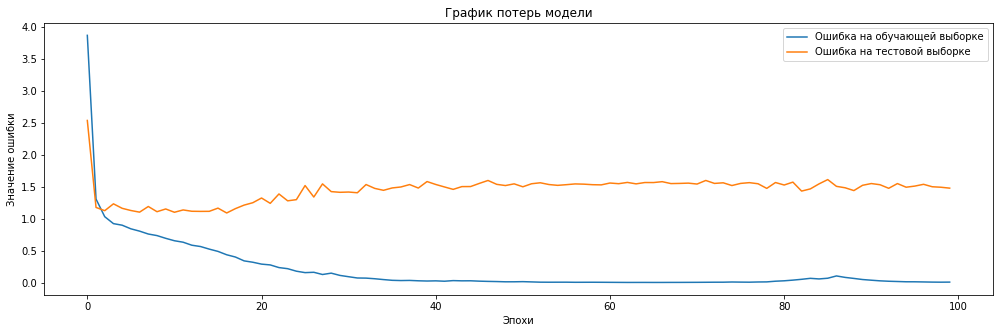

In [85]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist1):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist1.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist1.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist1)

9/9 [==============================] - 0s 2ms/step


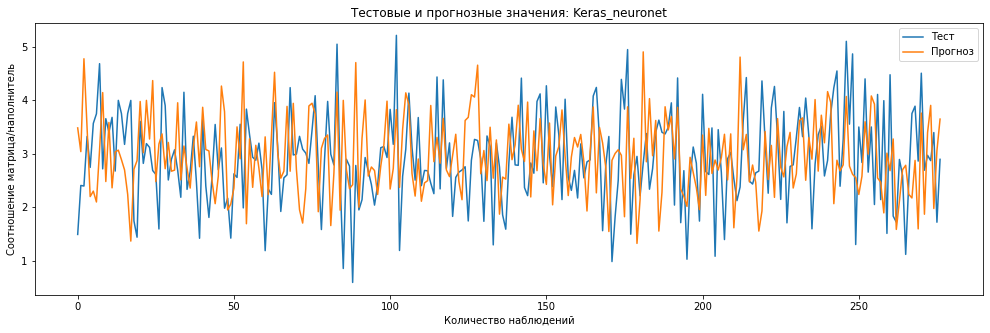

In [86]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [87]:
# оценка модели MSE
model1.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 4ms/step - loss: 1.1285 - root_mean_squared_error: 1.0623


[1.1284537315368652, 1.0622869729995728]

9/9 [==============================] - 0s 3ms/step


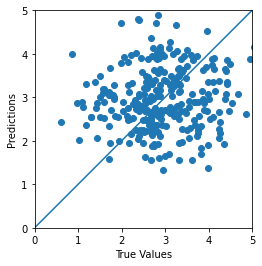

In [88]:
test_predictions = model1.predict(x_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)